# Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
Интерсепт  α показывает чему будет равна зависимая переменная, если независимая равна 0.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

zp = np.array([35,  45,  190, 200, 40,  70,  54,  150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


### 1. С intercept

In [2]:
r = np.corrcoef(zp, ks)
r[0][1]

0.8874900920739162

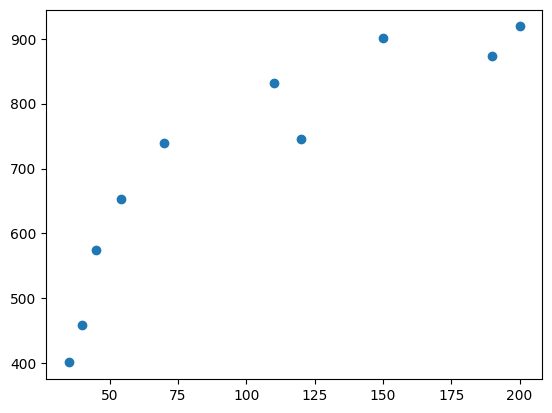

In [3]:
plt.scatter(zp, ks)
plt.show()

Из графика видно, что можно предположить о наличии линейной взаимосвязи:  
Линейная зависимость: $ \bar y=b_0+b_1\cdot \bar x$  

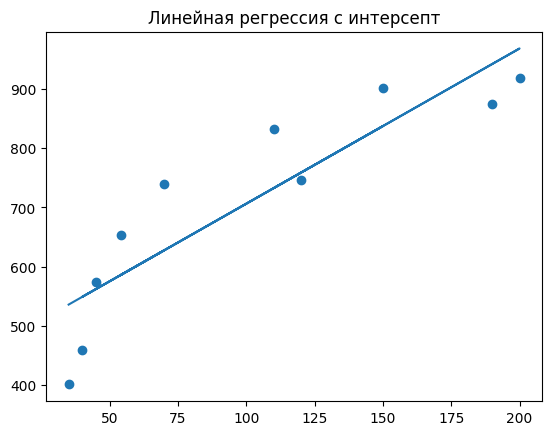

2.620538882402765 444.1773573243596 0.7876386635293682


In [4]:
# Через формулу
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b0 = np.mean(ks) - b1 * np.mean(zp)
y2 = b1 * zp + b0
plt.scatter(zp, ks)
plt.plot(zp, y2)
plt.title('Линейная регрессия c интерсепт')
plt.show()
R2 = np.corrcoef(zp, ks)[0, 1] ** 2
print(b1, b0, R2)

In [5]:
# Через модель линейной регрессии
model = LinearRegression() # зададим модель линейной регрессии
zp = zp.reshape(-1,1) # делаем массив zp двумерным атрибутом 
regres = model.fit(zp, ks) # подбираем коэффициенты
const = regres.intercept_
beta = regres.coef_
r_sq = model.score(zp, ks)
print(const) # выводим интерсепрт
print(beta) # выводим коэффициенты
print(r_sq)

444.17735732435943
[2.62053888]
0.7876386635293686


In [6]:
X1 = np.array([35,  45,  190, 200, 40,  70,  54,  150, 120, 110])
Y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Матричный метод
X2 = X1.reshape((len(X1), 1))
Y2 = Y1.reshape((len(X1), 1))
X3 = np.hstack([np.ones((len(X1), 1)), X2])
B = np.dot(np.linalg.inv(np.dot(X3.T, X3)), X3.T @ Y2)
print(B)

[[444.17735732]
 [  2.62053888]]


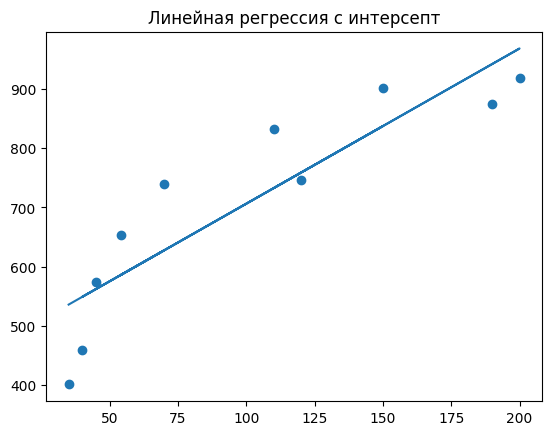

[2.62053888] [444.17735732] 0.7876386635293682


In [7]:
Y3 = B[1] * X1 + B[0]
plt.scatter(X1, Y1)
plt.plot(X1, Y3)
plt.title('Линейная регрессия c интерсепт')
plt.show()
R2 = np.corrcoef(X1, Y1)[0, 1] ** 2 #на 0.78 данные обусловлены моделью
print(B[1], B[0], R2)

### 2. Без intercept

Коэффициент наклона (slope): [5.88982042]


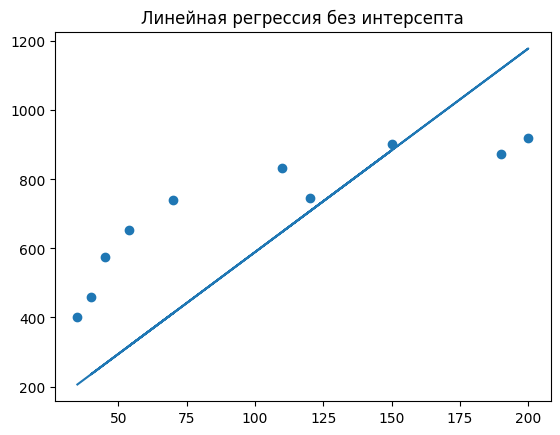

Коэффициент детерминации R2: 0.7876386635293682


In [8]:
X1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Матричный метод
X2 = X1.reshape((len(X1), 1))
Y2 = Y1.reshape((len(X1), 1))

# Удаляем интерсепт, добавив только столбец X1 к матрице X3
X3 = X2

# Проводим регрессию
B = np.dot(np.linalg.inv(np.dot(X3.T, X3)), X3.T @ Y2)

# Печать коэффициентов
print("Коэффициент наклона (slope):", B[0])

# Построение линии регрессии без интерсепта
Y3 = B[0] * X1

# Построение графика
plt.scatter(X1, Y1)
plt.plot(X1, Y3)

plt.title('Линейная регрессия без интерсепта')
plt.show()

# Вычисление коэффициента детерминации
R2 = np.corrcoef(X1, Y1)[0, 1] ** 2 
print("Коэффициент детерминации R2:", R2)

# Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [9]:
import numpy as np

def mse(B1, X1, Y1, n):
    return np.sum((B1 * X1 - Y1) ** 2) / n

B1 = 1
n = len(X1)
alpha = 5e-5

for i in range(10 ** 6 * 2):
    B1 -= alpha * (2 / n) * np.sum((B1 * X1 - Y1) * X1)
    
    if i % 50000 == 0:
        print(B1)


7.736510000000001
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689
5.889820420132689


# Задание 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [10]:
import numpy as np

def mse(B0, B1, X1, Y1, n):
    return np.sum((B0 + B1 * X1 - Y1) ** 2) / n


B0 = 1
B1 = 1
n = len(X1)
alpha = 5e-5

for i in range(10 ** 6 * 2):
    B1 -= alpha * (2 / n) * np.sum((B0 + B1 * X1 - Y1) * X1)
    B0 -= alpha * (2 / n) * np.sum((B0 + B1 * X1 - Y1))
    
    if i % 50000 == 0:
        print(B1, B0)


7.72637 0.9925446082
3.5381087420716133 319.51502824471754
2.878642760060478 409.11100221880963
2.6931411055032335 434.31351738597
2.6409612133145037 441.4027507809284
2.6262834943727165 443.3968862787093
2.622154788384688 443.95781806949253
2.620993421744373 444.11560297139556
2.6206667400970427 444.1599863985479
2.6205748475844 444.17247104430027
2.620548999074248 444.1759828591717
2.620541728128447 444.1769707000741
2.6205396828789684 444.17724857053906
2.620539107569286 444.17732673292005
2.620538945740027 444.1773487192703
2.620538900218938 444.1773549038294
2.6205388874142885 444.17735664348703
2.620538883812452 444.1773571328376
2.6205388827993557 444.1773572704783
2.6205388825144347 444.1773573091881
2.6205388824347713 444.1773573200112
2.620538882411012 444.17735732323916
2.620538882411012 444.17735732323916
2.620538882411012 444.17735732323916
2.620538882411012 444.17735732323916
2.620538882411012 444.17735732323916
2.620538882411012 444.17735732323916
2.620538882411012 444.1